# 불균형 데이터 처리

In [1]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification  # 데이터 셋 생성 패키지

# 불균형 데이터 처리 -언더 샘플링
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import OneSidedSelection

# 불균형 데이터 처리-오버 샘플링
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE

# 데이터 검증
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트
from sklearn.model_selection import RepeatedStratifiedKFold # Cross-Validation
from sklearn.model_selection import cross_validate # Cross-Validation

In [2]:
# 불균형 데이터에 처리에 따른 랜덤포레스트 결과 확인 함수 생성 
def Randomforest_Result(x, y, title):

    rf = RandomForestClassifier(criterion='entropy')
    #cv_rf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cv_rf = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
    scores = cross_validate(rf, x, y, scoring='f1', cv=cv_rf, n_jobs=-1)
    print(title,':','3-Fold CV f1 score: %.4f' % np.mean(scores['test_score']))    

    return 

In [3]:
# 데이터 셋 준비 
X_data, y_class = make_classification(n_classes=2, class_sep=2, n_samples=10000, 
                                      n_features=20, weights=[0.9, 0.1], flip_y=0,
                                      n_clusters_per_class=1, random_state=10)
print(X_data.shape)
y_class.shape

(10000, 20)


(10000,)

In [4]:
# count_and_plot 그리기 함수

from collections import Counter
from matplotlib import pyplot
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    print(counter.keys())
    print(counter.values())
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

Class=0, n=9000 (90.000%)
Class=1, n=1000 (10.000%)
dict_keys([0, 1])
dict_values([9000, 1000])


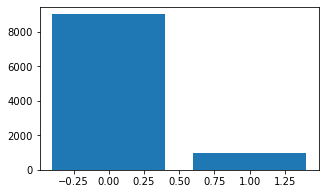

In [5]:
# 데이터셋 가시화 
plt.figure(figsize=(5, 3))
count_and_plot(y_class)

In [6]:
Randomforest_Result(X_data, y_class, "언더 샘플링_원본 데이터 결과")

언더 샘플링_원본 데이터 결과 : 3-Fold CV f1 score: 0.9895


### sampling_strategy

In [7]:
# 0과 1 사이의 숫자를 지정(소수 집단 데이터수 / 다수 집단 데이터수)하여 샘플링 
under_random_05 = RandomUnderSampler(sampling_strategy = 0.5) 
X_random_05, y_random_05 = under_random_05.fit_resample(X_data, y_class)
X_random_05.shape

(3000, 20)

Class=0, n=2000 (66.667%)
Class=1, n=1000 (33.333%)
dict_keys([0, 1])
dict_values([2000, 1000])


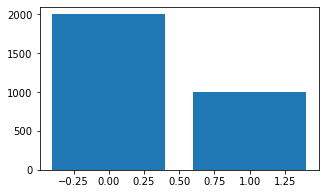

In [8]:
plt.figure(figsize=(5, 3))
count_and_plot(y_random_05)

In [9]:
Randomforest_Result(X_random_05, y_random_05, "언더 샘플링_랜덤언더샘플링_비율:0.5_데이터 결과")

언더 샘플링_랜덤언더샘플링_비율:0.5_데이터 결과 : 3-Fold CV f1 score: 0.9920


### 토멕링크 

In [10]:
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_data, y_class)
X_tl.shape

(9993, 20)

Class=0, n=8993 (89.993%)
Class=1, n=1000 (10.007%)
dict_keys([0, 1])
dict_values([8993, 1000])


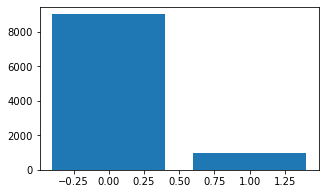

In [11]:
plt.figure(figsize=(5, 3))
count_and_plot(y_tl)

In [12]:
Randomforest_Result(X_tl, y_tl, "언더 샘플링_토멕링크_데이터 결과")

언더 샘플링_토멕링크_데이터 결과 : 3-Fold CV f1 score: 0.9889


### OSS(OneSidedSelection)

In [13]:
oss = OneSidedSelection(random_state=42)
X_oss, y_oss = oss.fit_resample(X_data, y_class)
X_oss.shape

(8666, 20)

Class=0, n=7666 (88.461%)
Class=1, n=1000 (11.539%)
dict_keys([0, 1])
dict_values([7666, 1000])


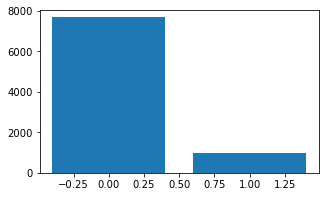

In [14]:
plt.figure(figsize=(5, 3))
count_and_plot(y_oss)

In [15]:
Randomforest_Result(X_oss, y_oss, "언더 샘플링_OSS_데이터 결과")

언더 샘플링_OSS_데이터 결과 : 3-Fold CV f1 score: 0.9889


(10000, 20)
Class=0, n=9000 (90.000%)
Class=1, n=1000 (10.000%)
dict_keys([0, 1])
dict_values([9000, 1000])


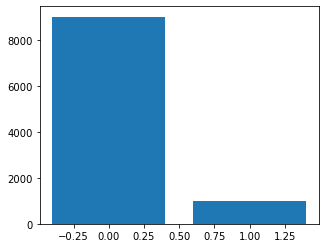

In [16]:
# 데이터 셋 준비 및 확인 
X_data, y_class = make_classification(n_classes=2, class_sep=2, n_samples=10000, 
                                      n_features=20, weights=[0.9, 0.1], flip_y=0,
                                      n_clusters_per_class=1, random_state=10)


print(X_data.shape)
y_class.shape

plt.figure(figsize=(5, 4))
count_and_plot(y_class)

In [17]:
Randomforest_Result(X_data, y_class, "오버 샘플링_원본 데이터 결과")

오버 샘플링_원본 데이터 결과 : 3-Fold CV f1 score: 0.9889


### 랜덤오버샘플링 

In [18]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_data, y_class)
X_ros.shape

(18000, 20)

Class=0, n=9000 (50.000%)
Class=1, n=9000 (50.000%)
dict_keys([0, 1])
dict_values([9000, 9000])


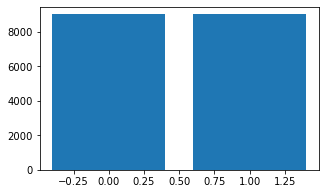

In [19]:
plt.figure(figsize=(5, 3))
count_and_plot(y_ros)

In [20]:
Randomforest_Result(X_data, y_class, "오버 샘플링_랜덤오버샘플링 결과")

오버 샘플링_랜덤오버샘플링 결과 : 3-Fold CV f1 score: 0.9899


### SMOTE 

In [21]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_data, y_class)

Class=0, n=9000 (50.000%)
Class=1, n=9000 (50.000%)
dict_keys([0, 1])
dict_values([9000, 9000])


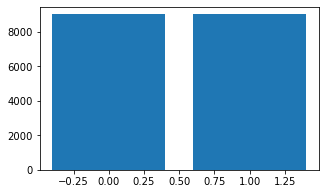

In [22]:
plt.figure(figsize=(5, 3))
count_and_plot(y_sm)

In [23]:
Randomforest_Result(X_sm, y_sm, "오버 샘플링_SMOTE 결과")

오버 샘플링_SMOTE 결과 : 3-Fold CV f1 score: 0.9981


### ADASYN

In [24]:
ada = ADASYN(random_state=42)
X_ada, y_ada = ada.fit_resample(X_data, y_class)

Class=0, n=9000 (49.972%)
Class=1, n=9010 (50.028%)
dict_keys([0, 1])
dict_values([9000, 9010])


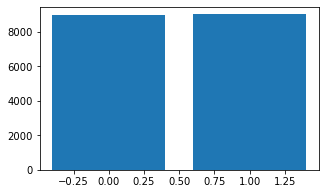

In [25]:
plt.figure(figsize=(5, 3))
count_and_plot(y_ada)

In [26]:
Randomforest_Result(X_ada, y_ada, "오버 샘플링_ADASYN 결과")

오버 샘플링_ADASYN 결과 : 3-Fold CV f1 score: 0.9987


### Boderline SMOTE

In [27]:
bor_sm = BorderlineSMOTE(random_state=42)
X_bor_sm, y_bor_sm = bor_sm.fit_resample(X_data, y_class)

Class=0, n=9000 (50.000%)
Class=1, n=9000 (50.000%)
dict_keys([0, 1])
dict_values([9000, 9000])


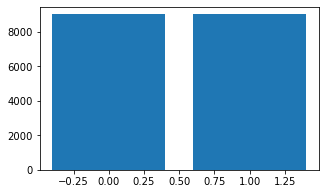

In [28]:
plt.figure(figsize=(5, 3))
count_and_plot(y_bor_sm)

In [29]:
Randomforest_Result(X_bor_sm, y_bor_sm, "오버 샘플링_Boderline SMOTE 결과")

오버 샘플링_Boderline SMOTE 결과 : 3-Fold CV f1 score: 0.9987
